<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [176]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import scipy
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [ ]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [177]:
#load manually downloaded file from library
df1 = pd.read_csv('loan_train.csv')
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [178]:
#clean up data by dropping columns of unnamed data
df = df1.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Convert to date time object


In [179]:
#Make the dates readable in Python
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [180]:
#How many people have paid there loans overall
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [181]:
# notice: installing seaborn might takes a few minutes - seaborn is a package used to simplify creating complex statistical graphs
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



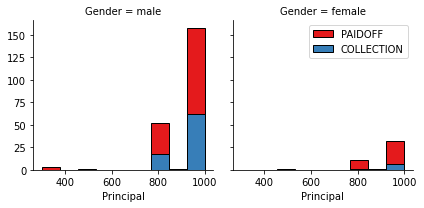

In [182]:
#Lets compare men and women, remembering that that 'Principal' describes the loan amount

import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

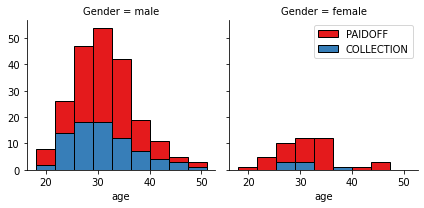

In [183]:
#Here we continue to classify by gender, but further subdivide by age of the person paying the loan (Debtor)

bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


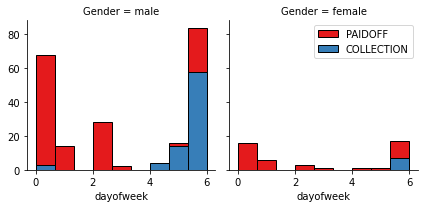

In [184]:
#This data helps us visualise the more and less popular days to take out a loan, and pay it off.
#note: (Monday =0, Tuesday=1, Wednesday=2,Thursday =3,  Friday=4 ,  Saturday =5, Sunday =6)

df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [185]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [186]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [187]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [188]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [189]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [190]:
#The general theme here is that we are converting the from words to numbers, and preferrably into columns with binary values, for easier analysis
Feature = df[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1) # takes a column of 3 values 'education' and splits into 3 columns
Feature.drop(['Master or Above'], axis = 1,inplace=True) # gets rid of any rows that have education of 'masters or above'

y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

Feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


### Feature Selection


Let's define feature sets, X:


In [191]:
#here are the many categories that identify the attributes of the person paying the loan
X = Feature
X[0:5]
print(X)

     Principal  terms  age  Gender  Bechalor  High School or Below  college
0         1000     30   45       0         0                     1        0
1         1000     30   33       1         1                     0        0
2         1000     15   27       0         0                     0        1
3         1000     30   28       1         0                     0        1
4         1000     30   29       0         0                     0        1
..         ...    ...  ...     ...       ...                   ...      ...
341        800     15   32       0         0                     1        0
342       1000     30   25       0         0                     1        0
343        800     15   39       0         0                     0        1
344       1000     30   28       0         0                     0        1
345       1000     30   26       0         0                     0        1

[346 rows x 7 columns]


What are our lables?


In [192]:
#did they pay the loan?
y= df['loan_status']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
341    1
342    1
343    1
344    1
345    1
Name: loan_status, Length: 346, dtype: int64


## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [193]:
#Here we take all the attributes and change their weighted values so they contribute in a proportional way
#or the model will skew to the highest numbers inputted.
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42, -0.38, -0.88,  1.15]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [194]:
#The classification methods that follow will use the normalised set 'X' and the out values in set'y'

#Here we use a package to take the 'X' and 'y' data and split it into 80 percent model training data, and 20 percent testing data.
#I have not repeated this split for each classifier, I have used this split once.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [195]:
#Import Model
from sklearn.neighbors import KNeighborsClassifier

k = 4 #initial k value guess

#Train Model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#Test Model
yhat = neigh.predict(X_test)
yhat[0:5]

#Score Train Model and Test Model Accuracy
from sklearn import metrics
print("Training Model Set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test Model Set Accuracy: ", metrics.accuracy_score(y_test, yhat))

#creates an arrary of zeros to put the these 10 values in - arrays start from 0, hence ks-1.
std_acc = np.zeros((Ks-1))
Ks = 10
mean_acc = np.zeros((Ks-1)) 

#Optimise for K parameter

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    

print( "The Best K Achievable Accuracy was found to be...", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Training Model Set Accuracy:  0.7644927536231884
Test Model Set Accuracy:  0.7571428571428571
The Best K Achievable Accuracy was found to be... 0.7714285714285715 with k= 5


# Decision Tree


In [196]:
#import Model

from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

#Define Model 
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#Train Model
drugTree.fit(X_train,y_train)

#Test Model
predTree = drugTree.predict(X_test)


In [197]:
#Score Model
from sklearn import metrics
print("Decision Tree Training Set Accuracy: ", metrics.accuracy_score(y_train, drugTree.predict(X_train)))
print("Decision Tree Test Set Accuracy: ", metrics.accuracy_score(y_test, predTree))

Decision Tree Training Set Accuracy:  0.7463768115942029
Decision Tree Test Set Accuracy:  0.7857142857142857


# Support Vector Machine


In [198]:
#Import Model 
from sklearn import svm

#Define Model
clf = svm.SVC(kernel='rbf')

#Train Model
clf.fit(X_train, y_train) 

#Test Model
yhat = clf.predict(X_test)
yhat [0:5]


#Score Model
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        55
           1       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[55  0]
 [15  0]]


C:\Users\ramir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


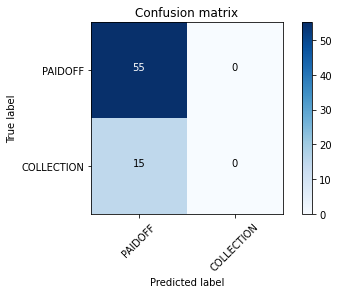

In [199]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [200]:
from sklearn.metrics import f1_score
print('The SVM model accuracy is', f1_score(y_test, yhat, average='weighted') )

#Please note I was skeptical of this  matrix, but I looked through the test y data vs the predicted y data and they did not have
#collection results in them, hence why the matrix looks like it is in error, but I believe it isn't.

The SVM model accuracy is 0.6914285714285714


# Logistic Regression


In [201]:
#import Model
from sklearn.linear_model import LogisticRegression


In [202]:
#Train Model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

#Test Model
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [203]:
#Score Model
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# Model Evaluation using Test set


In [204]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#!wget -O #loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

#import clean up and hot encode data to put in pre trained models...same process as before classifiers
#This data is not split into test and train, it is all used for testing only.
test_df = pd.read_csv('loan_test.csv')

#Here the data is cleaned up and hot encoded as above to be used in the models already created.

#drop unnamed columns
test_df1 = test_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
#make dates readable in python
test_df1['due_date'] = pd.to_datetime(df['due_date'])
test_df1['effective_date'] = pd.to_datetime(df1['effective_date'])

#change categorical values to numerical vauels
test_df1['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#group together the variables you wish to use in the model
Feature1 = test_df1[['Principal','terms','age','Gender']]

Feature1 = pd.concat([Feature1,pd.get_dummies(test_df1['education'])], axis=1) # takes a column of 3 values 'education' and splits into 3 columns

Feature1.drop(['Master or Above'], axis = 1,inplace=True) # gets rid of any rows that have education of 'masters or above'

y = test_df1['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

X = Feature1
X[0:5]
#print(X)

y= test_df1['loan_status']
#print(y)

X= preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]


First, download and load the test set:


In [ ]:
#loaded in line 5 of previous cell

### Load Test set for evaluation


In [208]:
# K-NEAREST NEIGBOUR
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train) # previous model
yhat2 = neigh.predict(X)#previous model with new Feature set inputted ( the test set)

#SCORE
print('Jaccard', jaccard_score(y, yhat2,pos_label=0))
print('F1', f1_score(y, yhat2, average='weighted'))


Jaccard 0.7358490566037735
F1 0.6604267310789049


In [209]:
# DECISION TREE
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) #define Model
drugTree.fit(X_train,y_train) # model trained to previous data set
predTree = drugTree.predict(X) #old model with new X feature set

#SCORE
print('Jaccard', jaccard_score(y, predTree,pos_label=0))
print('F1', f1_score(y, predTree, average='weighted'))

Jaccard 0.7407407407407407
F1 0.6304176516942475


In [211]:
# SUPPORT VECTOR MACHINE
clf = svm.SVC(kernel='rbf') # define model
clf.fit(X_train, y_train)  #previous trained model
yhat3 = clf.predict(X)#old model fitted to new X feature set data

#SCORE
print('Jaccard', jaccard_score(y, yhat3,pos_label=0))
print('F1', f1_score(y, yhat3, average='weighted'))

Jaccard 0.7407407407407407
F1 0.6304176516942475


In [212]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train) # previous model
yhat1 = LR.predict(X) # previous model with new X input to generate predicted y
print('Jaccard', jaccard_score(y, yhat1,pos_label=0))
print('F1', f1_score(y, yhat1, average='weighted'))

#SCORE
yhat1_prob = LR.predict_proba(X)
print('Log Loss', log_loss(y, yhat1_prob))


Jaccard 0.7407407407407407
F1 0.6304176516942475
Log Loss 0.6122392368229903


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.736   | 0.660    | NA      |
| Decision Tree      | 0.741   | 0.630    | NA      |
| SVM                | 0.741   | 0.630    | NA      |
| LogisticRegression | 0.741   | 0.630    | 0.612   |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
